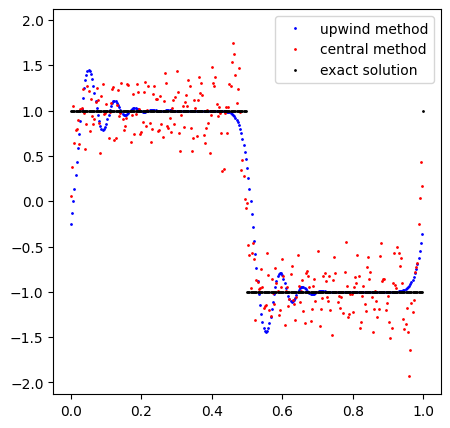

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math

fig = plt.figure(figsize=(5,5), facecolor="w", edgecolor="none")
graphs = []
flag_legend_1 = True   ### 凡例描画のフラグ
flag_legend_2 = True
flag_legend_3 = True

### 厳密解の描画のための関数
def exact_solution_x():
    x_exact = []
    for j in range(301):
        x_exact.append(j/300)
    return x_exact

def exact_solution_u(t):
    u_exact = []
    if ((0 <= t) and (t <= 0.5)):
        for j in range(301):
            u_exact.append(-1)   ### いったん-1を300個いれる
        for j in range(math.ceil(300*t),math.ceil(300*t+150)):
            u_exact[j] = 1
    else:
        for j in range(301):
            u_exact.append(1)
        for j in range(math.ceil(300*t)-150, math.ceil(300*t)):
            u_exact[j] = -1
    return u_exact

for i in range(1001):
    obj = []
    
    ### 風上差分の描画
    x,u = np.loadtxt(f"./data_upwind/data{i:04d}.dat" , unpack=True)
    a, = plt.plot(x,u, linewidth=0.0, marker="o", markersize=1, color="blue", label="upwind method")
    if flag_legend_1:   ### 一回のみ凡例を描画
        plt.legend(loc="upper right")
        flag_legend_1 = False
    obj += [a]
    
    ### 中央差分の描画
    x,u = np.loadtxt(f"./data_central/data{i:04d}.dat" , unpack=True)
    b, = plt.plot(x,u, linewidth=0.0, marker="o", markersize=1, color="red", label="central method")
    if flag_legend_2:   ### 一回のみ凡例を描画
        plt.legend(loc="upper right")
        flag_legend_2 = False
    obj += [b]

    ### 厳密解の描画
    t = i / 1000
    x = np.array(exact_solution_x())
    u = np.array(exact_solution_u(t))

    c, = plt.plot(x,u, linewidth=0.0, marker="o", markersize=1, color="black", label="exact solution")
    if flag_legend_3:   ### 一回のみ凡例を描画
        plt.legend(loc="upper right")
        flag_legend_3 = False
    obj += [c]

    graphs.append(obj)

### 1秒間に30枚出力させるような動画の作成
ani = animation.ArtistAnimation(fig, graphs, interval=30,blit=True)
### gifで出力, writerもpillowを使う。
ani.save("animation.gif", writer="pillow")

